In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np

<h1><b>B. Khám phá dữ liệu (đan xen với tiền xử lý dữ liệu)</b></h1>

### Đọc dữ liệu từ tập tin (file)

Đầu tiên, đọc dữ liệu từ file "movies.csv" và lưu kết quả vào DataFrame df_movie.

In [64]:
df_movie = pd.read_csv('movies.csv')
df_movie.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [65]:
df_movie.shape

(2000, 13)

Dữ liệu có 2000 dòng và 13 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong DataFrame `df_movie` cho biết thông tin của một bộ phim. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Ta sẽ xem thử rằng trong tập có dòng nào bị trùng không. Nếu trùng thì trả về True, không thì là False và lưu số dòng trùng vào biến num_duplicated_rows

In [66]:
#Tính tổng dòng lặp
num_duplicated_rows = df_movie.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
if is_duplicated == False:
    print('Bo du lieu khong lap')

So dong lap la 0
Bo du lieu khong lap


Vậy không có dòng lặp trong bộ dữ liệu này

### Mỗi cột có ý nghĩa gì?

Ý nghĩa của mỗi cột là:

- **Title** là tên của bộ phim

- **Rating** là điểm đánh giá trên IMDB

- **Year** là năm ra mắt phim.

- **Month** là tháng ra mắt phim.

- **Certificate** là nhãn của bộ phim đó.

- **Runtime** là thời lượng của bộ phim, tính theo phút.

- **Directors** là đạo diễn của bộ phim.

- **Stars** là diễn viên của bộ phim.

- **Genre** là thể loại phim.

- **Filming_location** là địa điểm quay phim.

- **Budget** là chi phí của bộ phim.

- **Income** là doanh thu của bộ phim.

- **Country_of_origin** là nước sản xuất phim.

In [67]:
df_movie.columns

Index(['Title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

Ta kiểm tra dạng dữ liệu của các cột để xem có đúng với dạng mà ta mong muốn không.

In [68]:
df_movie.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime               object
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Budget                object
Income                object
Country_of_origin     object
dtype: object

Ta thấy rằng các cột như **Runtime**, **Budge** và **Income** có thể chuyển sang dạng số (numerical) để tiện tính toán. Vậy ta sẽ chuyển các cột này sang dạng số

Đầu tiên là cột **Runtime**, ta sẽ coi các giá trị của nó

In [69]:
df_movie['Runtime'].unique()

array(['192', '117', '127', '114', '102', '132', '134', '112', '151',
       '107', '188', '105', '131', '125', '126', '98', '101', '161',
       '140', '147', '139', '97', '154', '123', '130', '115', '176', '87',
       '129', '104', '99', '93', '137', '128', '100', '148', '158', '96',
       '86', '108', '124', '89', '111', '103', '135', '95', '119', '136',
       '77', '118', '138', '159', '122', '187', '146', '121', '91', '116',
       '167', '113', '110', '141', '92', '155', '163', '106', '133', '88',
       '150', '156', '242', '109', '143', '152', '83', '120', '90', '144',
       '179', '142', '160', '94', '85', '181', '209', '169', '84', '149',
       '78', '75', '164', '70', '145', '79', '82', '168', '165',
       'Unknown', '153', '180', '50', '157', '172', '80', '162', '170',
       '166', '81', '191', '71', '175', '201', '178'], dtype=object)

Vì có một giá trị là Unknown nên ta sẽ chuyển giá trị này sang NaN bằng cách đặt errors = 'coerce'

In [70]:
df_movie['Runtime'] = pd.to_numeric(df_movie['Runtime'],errors='coerce')
df_movie['Runtime']

0       192.0
1       117.0
2       127.0
3       114.0
4       102.0
        ...  
1995    114.0
1996    117.0
1997     98.0
1998    105.0
1999     79.0
Name: Runtime, Length: 2000, dtype: float64

Tiếp theo là cột **Budget**

In [71]:
df_movie['Budget'].unique()

array(['$350,000,000 ', '$35,000,000 ', '$85,900,000 ', 'Unknown',
       '$12,000,000 ', '$120,000,000 ', '$80,000,000 ', '$20,000,000 ',
       '$10,000,000 ', '$40,000,000 ', '$78,000,000 ', '$1,000,000 ',
       '$16,000,000 ', '$195,000,000 ', '$100,000,000 ', '$250,000,000 ',
       '€ 10,000,000', '$25,000,000 ', '$3,000,000 ', '$150,000,000 ',
       '$170,000,000 ', '$17,000,000 ', '$200,000,000 ', '$4,500,000 ',
       '$32,000,000 ', '$60,000,000 ', '$72,000,000 ', '$2,000,000 ',
       '$68,000,000 ', '$24,000,000 ', '$9,000,000 ', '$50,000,000 ',
       '$90,000,000 ', '$250,000 ', '$85,000,000 ', '$8,000,000 ',
       '₹3,500,000,000', '$22,000,000 ', '€ 7,500,000', '$165,000,000 ',
       'CA$15,000', '$30,000,000 ', '$185,000,000 ', '$75,000,000 ',
       '$18,000,000 ', '$55,000,000 ', '$43,000,000 ', '€ 5,000,000',
       '$300,000,000 ', 'SEK\xa019,000,000', '$190,000,000 ',
       '$15,000,000 ', '$160,000,000 ', '$70,000,000 ', '$24,350,000 ',
       '$820,000 ', '

Ta thấy cột này có đơn vị tiền tệ khác nhau giữa các giá trị, vậy nên ta sẽ chuyển toàn bộ số tiền ở cột này sang đơn vị USD

In [72]:
def convert_price(price):
    
    price = price.replace(' ','')
    price = price.replace(',','')
    
    #Ấn Độ
    if '₹' in price:
        price = price.replace('₹','')
        return int(price)/74
    #Euro
    if '€' in price:
        price = price.replace('€','')
        return int(price)*1.14
    #Bảng Anh
    if '£' in price:
        price = price.replace('£','')
        return int(price)*1.38
    #Canada
    if 'CA$' in price:
        price = price.replace('CA$','')
        return int(price)*0.78
    #Thuỵ Điển
    if "SEK\xa0" in price:
        price = price.replace("SEK\xa0",'')
        return int(price)*0.12
    #Đan Mạch
    if "DKK\xa0" in price:
        price = price.replace("DKK\xa0",'')
        return int(price)*0.15
    #Trung Quốc
    if 'CN¥' in price:
        price = price.replace('CN¥','')
        return int(price)*0.15
    #Nhật Bản
    if '¥' in price:
        price = price.replace('¥','')
        return int(price)/111.68
    #Hàn Quốc
    if '₩' in price:
        price = price.replace('₩','')
        return int(price)/1210
    #Australia
    if 'A$' in price:
        price = price.replace('A$','')
        return int(price)*0.72
    #Nauy
    if 'NOK\xa0' in price:
        price = price.replace('NOK\xa0','')
        return int(price)/9.22
    #USD
    if '$' in price:
        price = price.replace('$','')
        return int(price)
    return price

Chuyển đổi trên toàn bộ cột

In [73]:
for i in df_movie['Budget'].index:
    df_movie['Budget'].at[i] = convert_price(df_movie['Budget'].loc[i])

df_movie['Budget'].unique()

array([350000000, 35000000, 85900000, 'Unknown', 12000000, 120000000,
       80000000, 20000000, 10000000, 40000000, 78000000, 1000000,
       16000000, 195000000, 100000000, 250000000, 11399999.999999998,
       25000000, 3000000, 150000000, 170000000, 17000000, 200000000,
       4500000, 32000000, 60000000, 72000000, 2000000, 68000000, 24000000,
       9000000, 50000000, 90000000, 250000, 85000000, 8000000,
       47297297.2972973, 22000000, 8550000.0, 165000000, 11700.0,
       30000000, 185000000, 75000000, 18000000, 55000000, 43000000,
       5699999.999999999, 300000000, 2280000.0, 190000000, 15000000,
       160000000, 70000000, 24350000, 820000, 110000000, 1100000,
       6497999.999999999, 39000000, 205000000, 6000000, 65000000,
       15959999.999999998, 14000000, 84500000, 45000000, 67000000,
       5000000, 50300000, 7000000, 34000000, 135000000, 33000000, 3500000,
       5300000, 175000000, 356000000, 11400000, 95000000, 159000000,
       275000000, 97600000, 19000000, 168

Vì có một giá trị là Unknown nên ta sẽ chuyển giá trị này sang NaN bằng cách đặt errors = 'coerce'

In [74]:
df_movie['Budget'] = pd.to_numeric(df_movie['Budget'],errors='coerce')
df_movie['Budget']

0       350000000.0
1        35000000.0
2        85900000.0
3               NaN
4        12000000.0
           ...     
1995            NaN
1996     95000000.0
1997     40000000.0
1998            NaN
1999       500000.0
Name: Budget, Length: 2000, dtype: float64

Cuối cùng là cột **Income**

In [75]:
df_movie['Income'].unique()

array(['$2,267,946,983 ', '$108,967 ', '$239,268,602 ', ...,
       '$141,591,324 ', '$20,235,426 ', '$54,683,487 '], dtype=object)

Có vẻ như cột này chỉ có đơn vị USD nên ta chỉ cần bỏ kí tự đầu

In [76]:
df_movie['Income'] = df_movie['Income'].str.replace(',','')
df_movie['Income'] = df_movie['Income'].str.replace('$','')
df_movie['Income'] = pd.to_numeric(df_movie['Income'],errors='coerce')
df_movie['Income']

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14476/2057679562.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_movie['Income'] = df_movie['Income'].str.replace('$','')


0       2.267947e+09
1       1.089670e+05
2       2.392686e+08
3       1.972082e+07
4       1.712539e+08
            ...     
1995    1.062878e+06
1996    1.600992e+08
1997    1.415913e+08
1998    2.023543e+07
1999    5.468349e+07
Name: Income, Length: 2000, dtype: float64

## XỬ LÝ DỮ LIỆU NAN

Ta xem thử mỗi cột có bao nhiêu dữ liệu nan

In [77]:
df_movie.isnull().sum()

Title                  0
Rating                 1
Year                   0
Month                  0
Certificate           34
Runtime                2
Directors              0
Stars                  0
Genre                  0
Filming_location       0
Budget               304
Income               145
Country_of_origin      0
dtype: int64

Ta sẽ coi cụ thể từng phim thiếu nhãn

In [78]:
df_movie[df_movie['Certificate'].isnull()]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
45,Kantara,8.5,2022,September,NaN,148.0,Rishab Shetty,"Rishab Shetty, Kishore Kumar G , Achyuth Kumar...","Action, Adventure, Drama",Unknown,2000000.00,2406221.0,India
51,Freddy,8.0,2022,December,NaN,124.0,Shashanka Ghosh,"Kartik Aaryan, Alaya F, Karan Pandit, Sajjad D...","Drama, Mystery, Romance",Unknown,NaN,NaN,India
52,Doctor G,6.9,2022,October,NaN,124.0,Anubhuti Kashyap,"Rakul Preet Singh, Ayushmann Khurrana, Shefali...","Comedy, Drama",Unknown,NaN,2171942.0,India
54,This Is Christmas,6.9,2022,December,NaN,111.0,Chris Foggin,"Alfred Enoch, Laura Aikman, Kriss Dillon, Jack...","Comedy, Romance",UK,9000000.00,NaN,United Kingdom
57,Your Christmas or Mine?,6.4,2022,December,NaN,95.0,Jim O Hanlon,"Asa Butterfield, Cora Kirk, Daniel Mays, Angel...","Comedy, Romance",UK,NaN,NaN,United Kingdom
64,The Mean One,4.2,2022,December,NaN,93.0,Steven LaMorte,"David Howard Thornton, Krystle Martin, Chase M...",Horror,Unknown,NaN,520200.0,United States
81,Decision to Leave,7.3,2022,June,NaN,139.0,Park Chan wook,"Park Hae il, Tang Wei, Lee Jung hyun, Go Kyung...","Crime, Drama, Mystery",South Korea,10000000.00,21661216.0,South Korea
84,Drishyam 2,8.6,2022,November,NaN,140.0,Abhishek Pathak,"Ajay Devgn, Tabu, Akshaye Khanna, Shriya Saran","Crime, Drama, Mystery",India,NaN,2776721.0,India
86,The Apology,5.0,2022,December,NaN,91.0,Alison Locke,"Anna Gunn, Linus Roache, Janeane Garofalo, Hol...",Thriller,USA,NaN,NaN,United States
92,Corsage,6.7,2022,December,NaN,113.0,Marie Kreutzer,"Vicky Krieps, Colin Morgan, Ivana Urban, Alma ...","Biography, Drama, History",Austria,8550000.00,1259206.0,"Austria, Luxembourg, Germany, France"


Vì khá khó để điền từng phim, cũng như các phim về Comedy chiếm phần nhiều nên ta sẽ để nhãn PG-13

In [79]:
df_movie['Certificate'].fillna('PG-13',inplace=True)

2 cột còn lại khá khó nên ta bỏ hết

In [80]:
df_movie.dropna(inplace=True)

In [81]:
df_movie

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,House of Sand and Fog,7.5,2003,January,R,126.0,Vadim Perelman,"Jennifer Connelly, Ben Kingsley, Ron Eldard, F...","Crime, Drama",USA,16500000.0,1.676380e+07,United States
1994,In the Cut,5.4,2003,October,R,119.0,Jane Campion,"Meg Ryan, Mark Ruffalo, Jennifer Jason Leigh, ...","Mystery, Thriller",USA,12000000.0,2.372679e+07,"United Kingdom, Australia, France, United States"
1996,Lara Croft Tomb Raider: The Cradle of Life,5.5,2003,July,PG-13,117.0,Jan de Bont,"Angelina Jolie, Gerard Butler, Chris Barrie, C...","Action, Adventure, Fantasy",Greece,95000000.0,1.600992e+08,"United States, Germany, Japan, United Kingdom,..."
1997,Gothika,5.8,2003,November,R,98.0,Mathieu Kassovitz,"Halle Berry, Pen lope Cruz, Robert Downey Jr ,...","Horror, Mystery, Thriller",Canada,40000000.0,1.415913e+08,"United States, France, Canada, Spain"


## Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [82]:
dtypes = df_movie.dtypes
ind = dtypes[(dtypes == np.float64) | (dtypes == np.int64)].index
ind

Index(['Rating', 'Year', 'Runtime', 'Budget', 'Income'], dtype='object')

Ta có các cột dữ liệu dạng số 'Rating', 'Year', 'Runtime', 'Budget', 'Income'. Ta sẽ tính min, lower quartile, median, upper quartile, max để xem sự phân bố của dữ liệu và có gì bất thường ở các cột này không?

In [83]:
num_col_info_df = pd.DataFrame([],index= ["min", "lower_quartile", "median", "upper_quartile", "max" ])
for i in ind:
    data = np.nanpercentile(df_movie[i],(0,25,50,75,100)) #tinh min, lower quartile, median, upper quartile, max
    num_col_info_df[i] = data.round(1)
num_col_info_df

,Rating,Year,Runtime,Budget,Income
min,1.9,2003.0,71.0,12.5,3.492000e+03
lower_quartile,6.2,2007.0,100.0,17250000.0,4.177813e+07
median,6.8,2011.0,112.0,40000000.0,1.058333e+08
upper_quartile,7.3,2016.0,126.0,85000000.0,2.454062e+08
max,9.0,2022.0,209.0,356000000.0,2.922918e+09


Thông qua sự phân bố của các dữ liệu dạng số, ta nhận thấy rằng không có sự bất thường nào ở dữ liệu.

## Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [84]:
dtypes = df_movie.dtypes
ind = dtypes[(dtypes != np.float64) & (dtypes != np.int64)].index
ind

Index(['Title', 'Month', 'Certificate', 'Directors', 'Stars', 'Genre',
       'Filming_location', 'Country_of_origin'],
      dtype='object')

Ta có các cột không phải dữ liệu dạng số 'Title', 'Month', 'Certificate', 'Directors', 'Stars', 'Genre', 'Filming_location', 'Country_of_origin'. Các cột 'Title', 'Month', 'Directors', 'Stars', 'Filming_location', 'Country_of_origin' chỉ là các cột tên riêng, không có gì đặc biệt ở các cột dữ liệu này để phân tích.

Ta có một cột categorical 'Certificate' và một cột multichoice 'Genre'. Ta sẽ tính số giá trị khác nhau của các cột này và số lượng xuất hiện của các giá trị đó.

In [85]:
df_movie["Certificate"].value_counts()

R            728
PG-13        663
PG           195
Not Rated     30
G             21
TV-MA          7
NC-17          4
Unrated        2
TV-14          1
Name: Certificate, dtype: int64

In [86]:
arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
for value, count in zip(unique_values, value_counts):
    print(f"{value} : {count}")

Action : 599
Adventure : 484
Animation : 102
Biography : 116
Comedy : 556
Crime : 270
Drama : 770
Family : 97
Fantasy : 181
History : 46
Horror : 199
Music : 37
Musical : 14
Mystery : 177
Romance : 223
Sci-Fi : 200
Sport : 25
Thriller : 289
War : 16
Western : 8


Dữ liệu ở 2 cột này không có gì bất thường.

<h1><b>C. Khám phá mối quan hệ trong dữ liệu</b></h1>

<h3><b>1. Biểu đồ 1</b></h3>

**Ý tưởng:** Thể loại phim nào phổ biến nhất

**Mục đích đề xuất ý tưởng:** Tìm hiểu, quan sát và nhận xét về xu hướng, chất lượng phim thông qua số lượng phim của từng thể loại.

**Các trường dữ liệu liên quan:** Genre.

**Biểu đồ biểu diễn và tính phù hợp của biểu đồ với các trường dữ liệu:**<br>
Biểu đồ được sử dụng để trực quan là **Bar chart**.<br>
Tính phù hợp của biểu đồ với các trường dữ liệu được ở chổ:
-   Thể hiện rõ số lượng phim của từng thể loại.
-   Đơn giản, trực quan

**Vẽ biểu đồ**

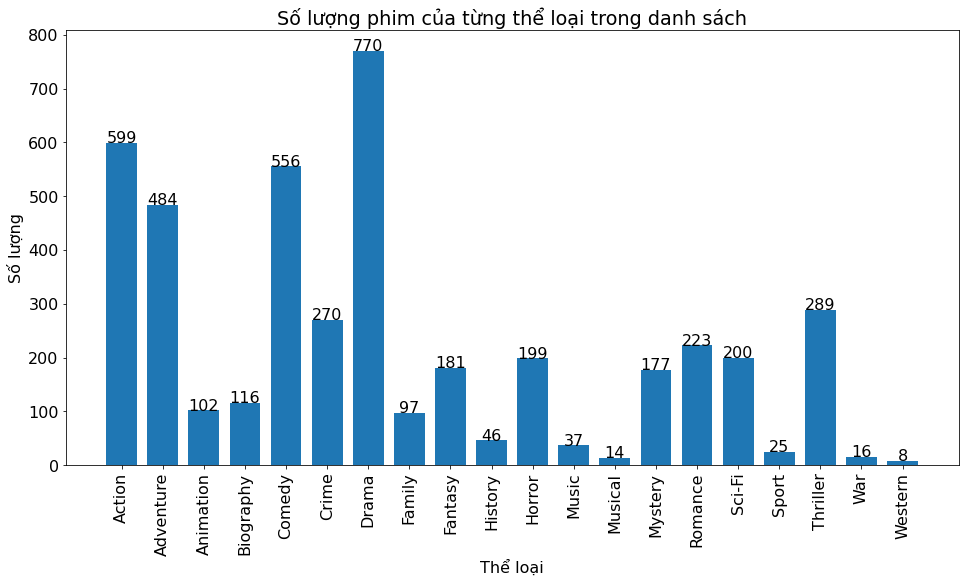

In [400]:
genre_arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_genres, value_counts = np.unique(genre_arr, return_counts=True)

def value_label(genres, counts):
    for i in range(len(genres)):
        plt.text(i, counts[i], counts[i], ha = 'center')
         
plt.figure(figsize=(16,8))
plt.bar(unique_genres, value_counts, align="center", width=0.75 , alpha= 1)
plt.xticks(rotation = 'vertical')
plt.title("Số lượng phim của từng thể loại trong danh sách")
value_label(unique_genres, value_counts)         
plt.ylabel("Số lượng")
plt.xlabel("Thể loại")
plt.rc('font', size=24)
plt.show()

### Nhận xét:

-   Qua quan sát, có thể thấy các bộ phim thuộc các thể loại Action, Adventure, Comedy, Drama chiếm số lượng lớn trong danh sách, nhiều nhất là thể loại Drama với 770 bộ phim. Ngược lại, các bộ phim thuộc thể loại Animation, Biography, Family, History, Music, Musical, Sport, War, Western xuất hiện rất ít trong danh sách, ít nhất là Western với 8 bộ phim.

-   Do thị hiếu người xem nên các bộ phim thuộc thể loại Action, Drama, Adventure, Comedy, Thriller được chú trọng về số lượng lẫn chất lượng, thường xuyên nằm trong top 100 bộ phim được đánh giá cao của năm. Mặt khác, các bộ phim thuộc thể loại Animation, Biography, Family, History, Musical, War, Western khá kén người xem hoặc chỉ phù hợp với một số độ tuổi, đối tượng nhất định nên chưa được chú trọng đầu tư sản xuất, phần đông chất lượng chưa được đánh giá cao, chỉ có một số bộ phim nổi bật được liệt kê vào danh sách.

### Ý nghĩa:

Những bộ phim thuộc thể loại Adventure, Action, Comedy, Drama thường xuyên được đánh giá cao và thường xuyên nằm trong danh sách 100 bộ phim hay nhất mỗi năm.

<h3><b>2. Biểu đồ 2</b></h3>

**Ý tưởng:** So sánh trung bình rating của từng thể loại trong từ năm 2003 đến năm 2022.

**Mục đích đề xuất ý tưởng:** Tìm hiểu, quan sát và nhận xét về xu hướng, chất lượng và điểm đánh giá trung bình của từng thể loại phim qua từng năm.

**Các trường dữ liệu liên quan:** Year, Genre và Rating.

**Biểu đồ biểu diễn và tính phù hợp của biểu đồ với các trường dữ liệu:**<br>
Biểu đồ được sử dụng để trực quan là **Heatmap**.<br>
Tính phù hợp của biểu đồ với các trường dữ liệu được ở chổ:
-   So sánh được tương quan giữa nhiều trường dữ liệu với nhau, cụ thể là 3 trường Year, Genre và Rating.
-   Xem và hiểu nhanh số lượng lớn dữ liệu ở dạng trực quan.
-   Giúp nhấn mạnh các dữ liệu quan trọng, dễ dàng nhận ra được xu hướng xem phim và làm phim theo thể loại qua từng năm.

**Vẽ biểu đồ**

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


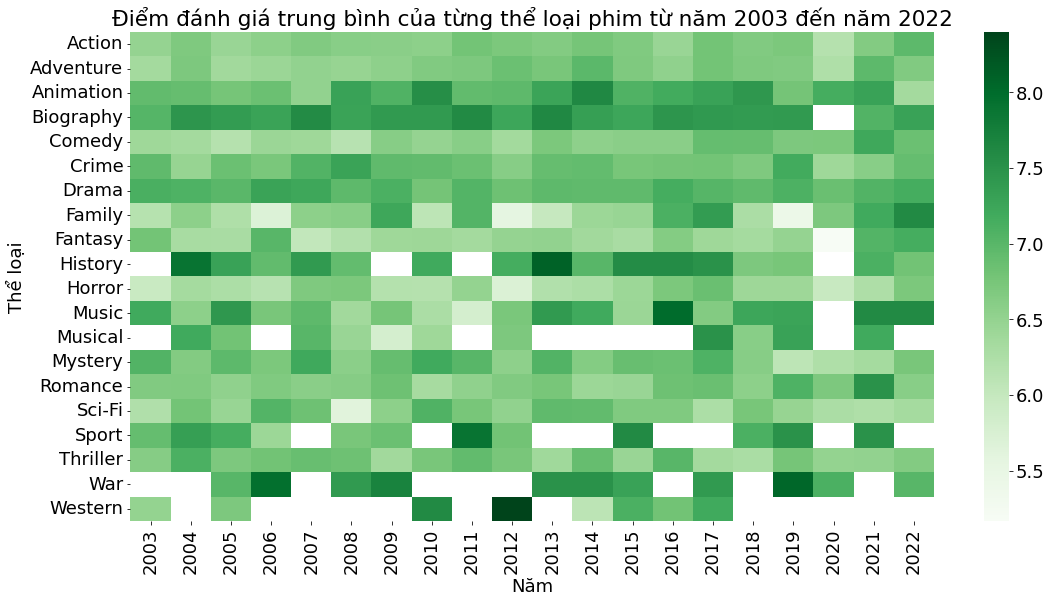

In [404]:

import matplotlib.colors as colors

genre_arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_genres, genre_counts = np.unique(genre_arr, return_counts=True)
unique_ratings, rating_counts = np.unique(df_movie["Rating"], return_counts=True)
unique_years = np.unique(df_movie["Year"], return_counts=False)

mean_matrix = []
for unique_genre in unique_genres:

    mean_year = []
    for unique_year in unique_years:
    
        rating_list = []
        for rating, genre, year in zip(df_movie["Rating"], df_movie["Genre"], df_movie["Year"]):

            if (unique_genre in genre) and (unique_year == year):
                rating_list.append(rating)
       
        mean_year.append(np.mean(rating_list))   
    mean_matrix.append(mean_year)

df_visual = pd.DataFrame(mean_matrix, unique_genres, unique_years)
df_visual
plt.figure(figsize=(18,9))
sns.heatmap(df_visual, cmap = "Greens")
plt.title("Điểm đánh giá trung bình của từng thể loại phim từ năm 2003 đến năm 2022")
plt.xlabel("Năm")
plt.ylabel("Thể loại")
plt.rc('font', size=16)
plt.show()

### Nhận xét:

-   Qua quan sát, các bộ phim xuất hiện trong danh sách tập trung chủ yếu ở các thể loại Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Family, Horror, Mystery, Romance, Sci-Fi và Thriller. Có thể thấy những thể loại này là những thể loại phim thịnh hành, luôn nằm trong top 100 bộ phim được đánh giá cao của năm, từ 2003 đến 2022.

-   Các thể loại phim như Musical, Sport, War, Western có những năm biến mất khỏi danh sách, có năm trở lại danh sách với điểm đánh giá trung bình khá cao (từ 7.0 đến 8.0).

-   Xét về điểm đánh giá trung bình của từng thể loại qua các năm, thể loại Animation, Biography và Music luôn có điểm đánh giá trung bình cao hơn các thể loại khác (trên 7.0).

-   Năm 2005, các bộ phim phân bố rating đồng đều nhất trên danh sách về mặt thể loại. Ngược lại, năm 2020, các bộ phim phân bố rating không đồng đều nhất, cụ thể các thể loại Biography, Fantasy, History, Music, Musical, Sport, Western, Horror bị loại khỏi danh sách.

-   Các năm 2021, 2022, các thể loại phim có trong danh sách đạt rating khá cao, đa số lớn hơn 6.5, nhiều thể loại phim đạt rating hơn 7.0.

-   Chất lượng phim của thể loại Animation, Biography, Family, Music ngày càng được đánh giá cao. Ngược lại, chất lượng phim của thể loại Western ngày càng được đánh giá thấp và biến mất khỏi danh sách.

### Ý nghĩa:
Các thể loại phim có mặt trong danh sách trong những năm gần đây đều có rating ngày càng cao. Các năm 2017, 2019, 2021, 2022, các thể loại phim hầu hết đều có điểm rating trung bình trên 6.5, trong đó có nhiều thể loại đạt rating trung bình trên 7.0. Riêng năm 2020, có thể do ảnh hưởng của dịch Covid-19 nên các bộ phim chưa được đánh giá cao và hầu hết đạt điểm khá thấp.